<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/img_process/task4/question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy

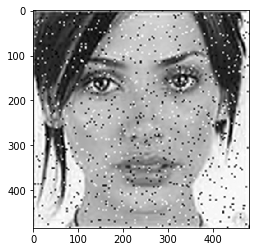

In [2]:
img_file = 'Lista4_Img1.jpg'
img = cv2.imread(img_file)

plt.imshow(img)

## Standard Kernels and Filters

In [0]:
blur = cv2.blur(img,(5,5))
g_blur = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)
bilateral = cv2.bilateralFilter(img,9,75,75)

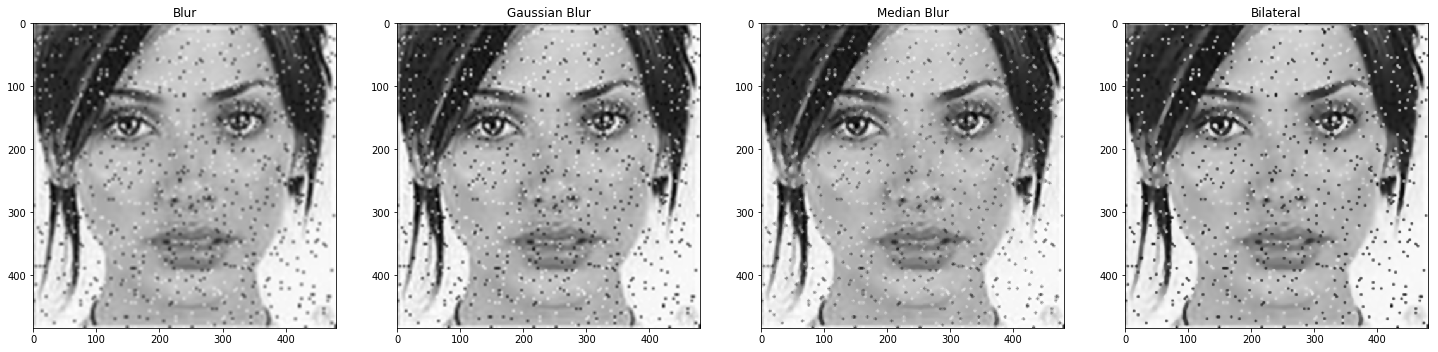

In [4]:
f = plt.figure(figsize=(25,25))
ax_1 = f.add_subplot(141)
ax_1 = plt.imshow(blur)
ax_1 = plt.title('Blur')

ax_2 = f.add_subplot(142)
ax_2 = plt.imshow(g_blur)
ax_2 = plt.title('Gaussian Blur')

ax_3 = f.add_subplot(143)
ax_3 = plt.imshow(median)
ax_3 = plt.title('Median Blur')

ax_4 = f.add_subplot(144)
ax_4 = plt.imshow(bilateral)
ax_4 = plt.title('Bilateral')



In [0]:
p_img = cv2.blur(p_img,(5,5))
p_img = cv2.GaussianBlur(p_img,(5,5),0)
p_img = cv2.medianBlur(p_img,5)
p_img = cv2.bilateralFilter(p_img,9,75,75)

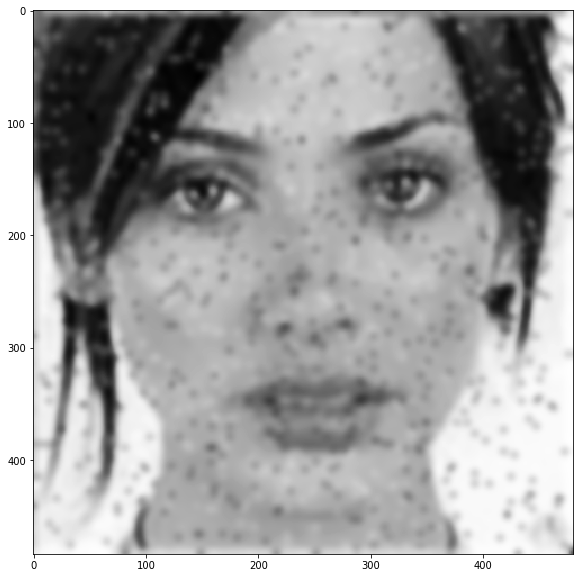

In [47]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax = plt.imshow(p_img, cmap = 'gray')

## Custom Kernels

### Low Pass Convolution

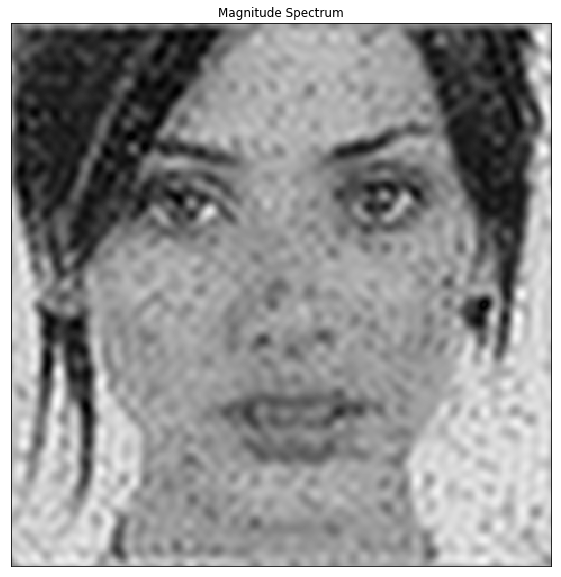

In [49]:
offset = 30

img = cv2.imread('Lista4_Img1.jpg',0)
img_float32 = numpy.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = numpy.fft.fftshift(dft)

rows, cols = img.shape

center_row, center_col = rows//2 , cols//2  


mask = numpy.zeros((rows, cols, 2), numpy.uint8)
mask[crow-offset:crow+offset, 
     ccol-offset:ccol+offset] = 1



fshift = dft_shift*mask
f_ishift = numpy.fft.ifftshift(fshift)
img_low_pass = cv2.idft(f_ishift)
img_low_pass = cv2.magnitude(img_low_pass[:,:,0],img_low_pass[:,:,1])


f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax = plt.imshow(img_low_pass, cmap = 'gray')
ax = plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


[]

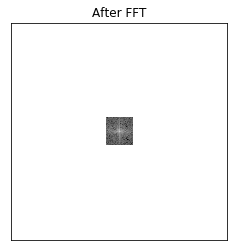

In [55]:
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

plt.subplot(), 
plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.plot()

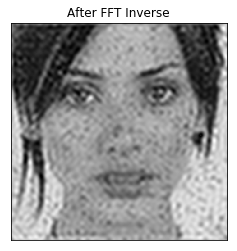

In [60]:
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot()
plt.imshow(img_back, cmap='gray')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()